In [1]:
import time
import mlrose_hiive as mlrh
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

random_state = 1000
np.random.seed(1)

# N Queens Problem

In [2]:
# 16 Queens Problem definition
length = 16
# Define alternative N-Queens fitness function for maximization problem
def queens_max(state):
    # Initialize counter
    fitness_cnt = 0

    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):

                # If no attacks, then increment counter
                fitness_cnt += 1

    return fitness_cnt

# Initialize custom fitness function object
q_fitness = mlrh.CustomFitness(queens_max)
prob = mlrh.DiscreteOpt(length=length,
                      fitness_fn=q_fitness,
                      maximize=True,
                        max_val = 16)
experiment_name = "Queen"
output_directory = "Queen"

## Mimic

In [3]:
mmc = mlrh.MIMICRunner(problem=prob,
                       experiment_name=experiment_name,
                       output_directory=output_directory,
                       seed=random_state,
                       population_sizes=[1000, 2000, 3000],
                       keep_percent_list=[0.1, 0.15, 0.20],
                       iteration_list=[50],
                       max_attempts=25,
                       use_fast_mimic=True)
mmc_stats, mmc_curve = mmc.run()

In [4]:
columns = ['Time', 'Fitness', 'Population Size', 'Keep Percent']
pd.set_option('display.max_rows',10)
df=pd.read_csv("./Queen/Queen/mimic__Queen__run_stats_df.csv")
df[columns].sort_values(by=['Fitness'], ascending=True).head(10)

,Time,Fitness,Population Size,Keep Percent
0,0.052329,104.0,1000,0.10
14,0.167391,104.0,3000,0.15
12,0.142567,104.0,3000,0.10
10,0.096847,104.0,2000,0.20
16,0.141058,104.0,3000,0.20
6,0.095932,104.0,2000,0.10
8,0.095291,104.0,2000,0.15
4,0.049158,104.0,1000,0.20
2,0.048313,104.0,1000,0.15
1,4.442641,117.0,1000,0.10


In [5]:
best_index_in_curve = mmc_curve.Fitness.idxmin()
best_kp = mmc_curve.iloc[best_index_in_curve]['Keep Percent']
best_pz = mmc_curve.iloc[best_index_in_curve]['Population Size']
best_curve_mmc = mmc_curve.loc[(mmc_curve['Keep Percent'] == best_kp) & (mmc_curve['Population Size'] == best_pz)]
best_curve_mmc.reset_index(inplace=True)

Text(0, 0.5, 'Fitness')

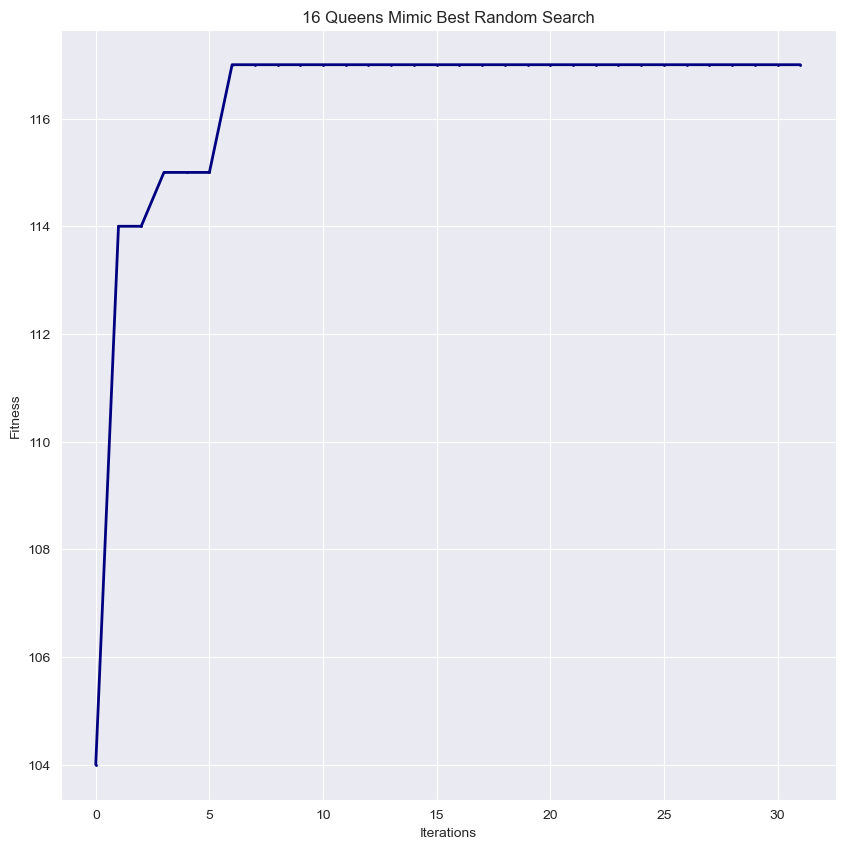

In [6]:
ax = best_curve_mmc.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2,
                             title='16 Queens Mimic Best Random Search')
ax.set_xlabel("Iterations")
ax.set_ylabel("Fitness")

## Genetic Algorithm

In [7]:
ga = mlrh.GARunner(problem=prob,
                   experiment_name=experiment_name,
                   output_directory=output_directory,
                   seed=random_state,
                   max_attempts=25,
                   iteration_list=[50],
                   population_sizes=[500, 1000, 2000, 3000],
                   mutation_rates=[0.1, 0.25, 0.5])
ga_stats, ga_curve = ga.run()

In [8]:
columns = ['Time', 'Fitness', 'Population Size', 'Mutation Rate']
pd.set_option('display.max_rows',10)
df=pd.read_csv("./Queen/Queen/ga__Queen__run_stats_df.csv")
df[columns].sort_values(by=['Fitness'], ascending=True).head(10)

,Time,Fitness,Population Size,Mutation Rate
0,0.032513,104.0,500,0.10
20,0.139919,104.0,3000,0.25
2,0.023373,104.0,500,0.25
18,0.141144,104.0,3000,0.10
4,0.023229,104.0,500,0.50
16,0.095144,104.0,2000,0.50
6,0.046513,104.0,1000,0.10
14,0.094262,104.0,2000,0.25
8,0.047436,104.0,1000,0.25
10,0.048362,104.0,1000,0.50


In [9]:
best_index_in_curve = ga_curve.Fitness.idxmin()
best_mr = ga_curve.iloc[best_index_in_curve]['Mutation Rate']
best_pz = ga_curve.iloc[best_index_in_curve]['Population Size']
best_curve_ga = ga_curve.loc[(ga_curve['Mutation Rate'] == best_mr) & (ga_curve['Population Size'] == best_pz)]
best_curve_ga.reset_index(inplace=True)

Text(0, 0.5, 'Fitness')

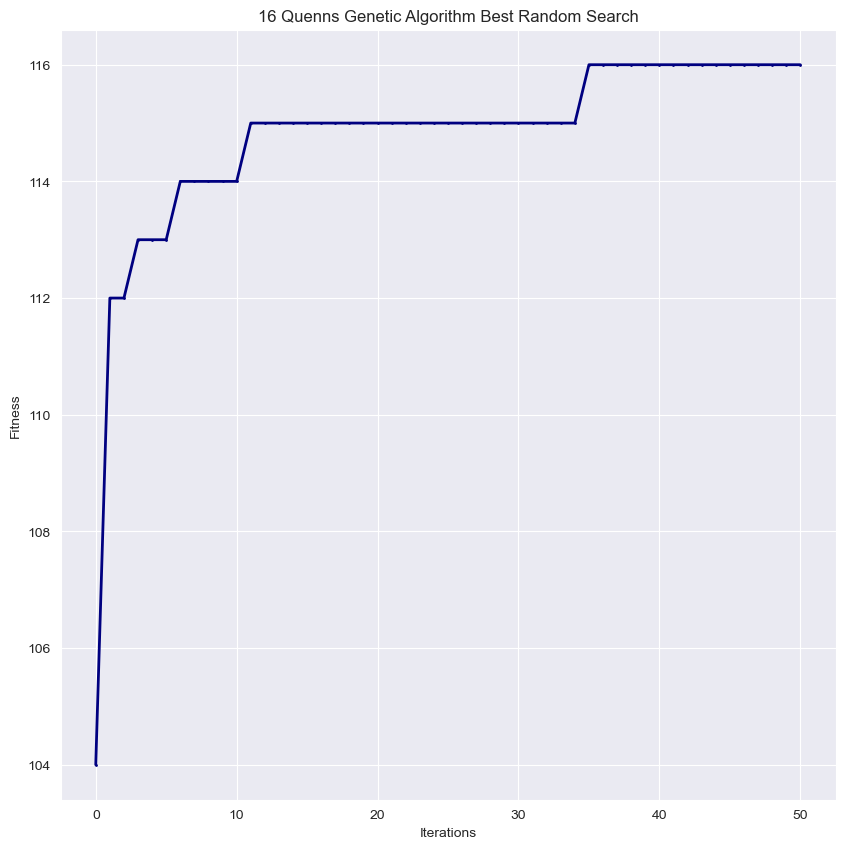

In [10]:
ax = best_curve_ga.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2,
                             title='16 Quenns Genetic Algorithm Best Random Search')
ax.set_xlabel("Iterations")
ax.set_ylabel("Fitness")

## Simulated Annealing

In [11]:
sa = mlrh.SARunner(problem=prob,
                   experiment_name=experiment_name,
                   output_directory=output_directory,
                   seed=random_state,
                   max_attempts=500,
                   iteration_list=[5000],
                   temperature_list=[0.05, 0.1, 0.5, 1, 10, 20, 25],
                   decay_list=[mlrh.GeomDecay, mlrh.ExpDecay, mlrh.ArithDecay])
sa_stats, sa_curve = sa.run()

In [12]:
columns = ['Time', 'Fitness', 'Temperature', 'schedule_type']
pd.set_option('display.max_rows',10)
df=pd.read_csv("./Queen/Queen/sa__Queen__run_stats_df.csv")
df[columns].sort_values(by=['Fitness'], ascending=True).head(10)

,Time,Fitness,Temperature,schedule_type
29,2.582829,98.0,10.00,arithmetic
35,2.727401,102.0,20.00,arithmetic
0,0.000621,104.0,0.05,geometric
38,0.000148,104.0,25.00,exponential
36,0.000142,104.0,25.00,geometric
34,0.000140,104.0,20.00,arithmetic
32,0.000128,104.0,20.00,exponential
30,0.000132,104.0,20.00,geometric
28,0.000150,104.0,10.00,arithmetic
26,0.000130,104.0,10.00,exponential


In [13]:
best_index_in_curve = sa_curve.Fitness.idxmin()
best_T = sa_curve.iloc[best_index_in_curve].Temperature
best_curve_sa = sa_curve.loc[sa_curve.Temperature == best_T, :]
best_curve_sa.reset_index(inplace=True)

Text(0, 0.5, 'Fitness')

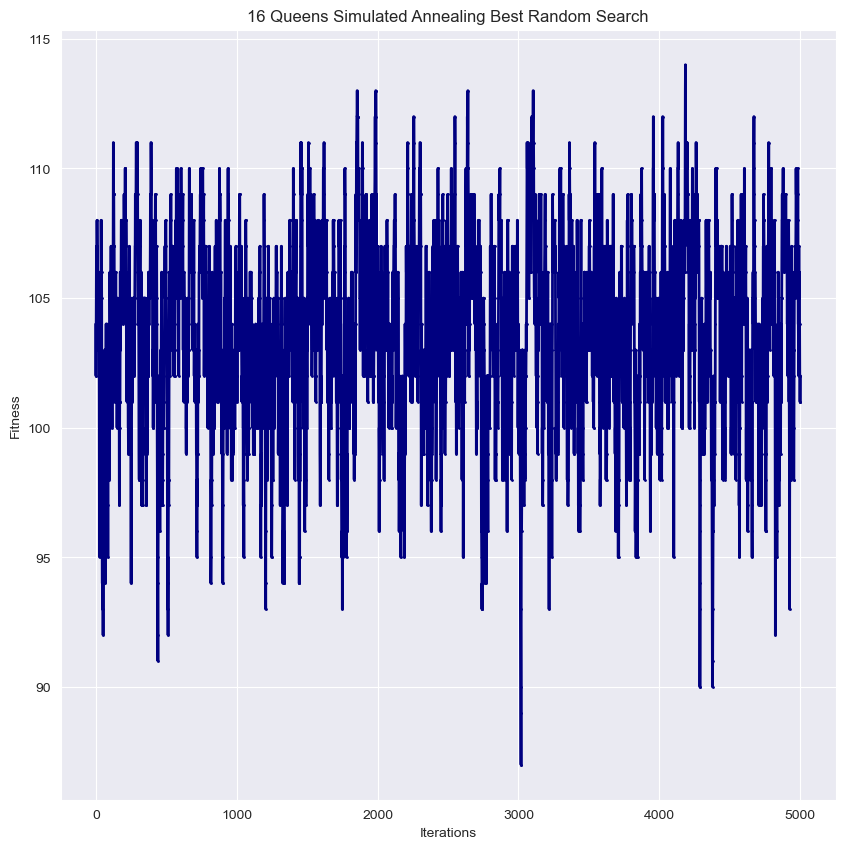

In [14]:
ax = best_curve_sa.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2,
                             title='16 Queens Simulated Annealing Best Random Search')
ax.set_xlabel("Iterations")
ax.set_ylabel("Fitness")

## Randomized Hill Climbing

In [15]:
rhc = mlrh.RHCRunner(problem=prob,
                    experiment_name=experiment_name,
                    output_directory=output_directory,
                    seed=random_state,
                    max_attempts=500,
                    iteration_list=[5000],
                    restart_list=[10])
rhc_stats, rhc_curve = rhc.run()

In [16]:
columns = ['Time', 'Fitness', 'Restarts', 'current_restart']
pd.set_option('display.max_rows',10)
df=pd.read_csv("./Queen/Queen/rhc__Queen__run_stats_df.csv")
df[columns].sort_values(by=['Fitness'], ascending=True).head(10)

,Time,Fitness,Restarts,current_restart
18,4.231562,96.0,10,9
6,0.521651,98.0,10,3
8,0.848133,99.0,10,4
4,0.282998,99.0,10,2
16,3.448201,102.0,10,8
10,1.315284,103.0,10,5
0,0.000156,104.0,10,0
20,5.093853,105.0,10,10
14,2.520525,105.0,10,7
2,0.104030,107.0,10,1


In [17]:
best_index_in_curve = rhc_curve.Fitness.idxmin()
best_cr = rhc_curve.iloc[best_index_in_curve].current_restart
best_curve_rhc = rhc_curve.loc[rhc_curve.current_restart == best_cr, :]
best_curve_rhc.reset_index(inplace=True)

Text(0, 0.5, 'Fitness')

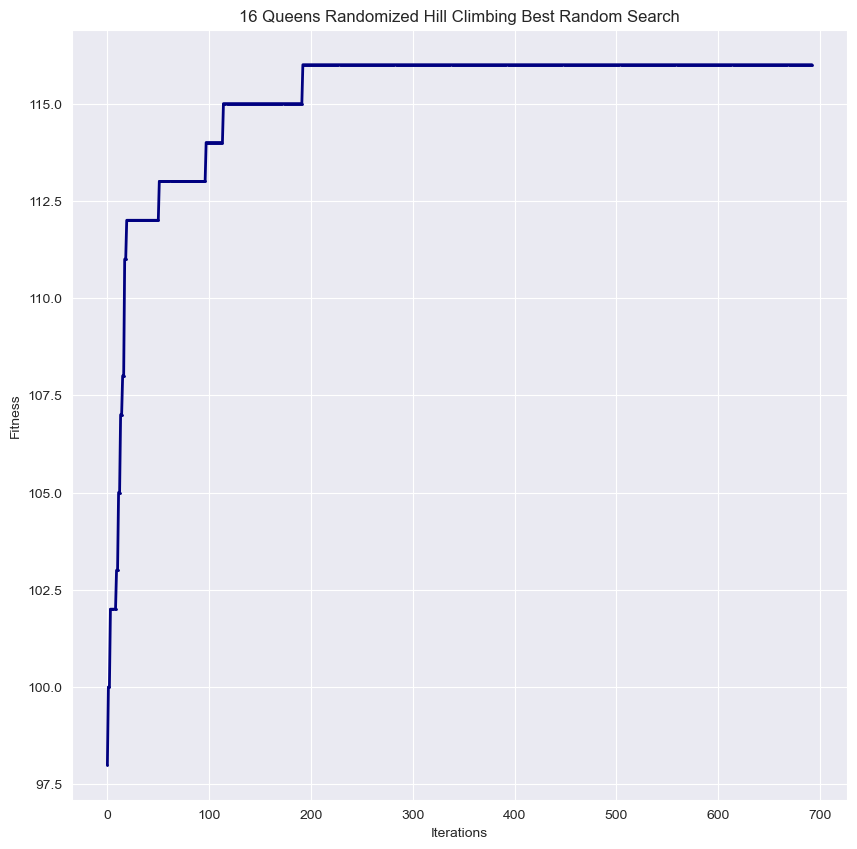

In [18]:
ax = best_curve_rhc.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2,
                             title='16 Queens Randomized Hill Climbing Best Random Search')
ax.set_xlabel("Iterations")
ax.set_ylabel("Fitness")

## Fitness vs iterations

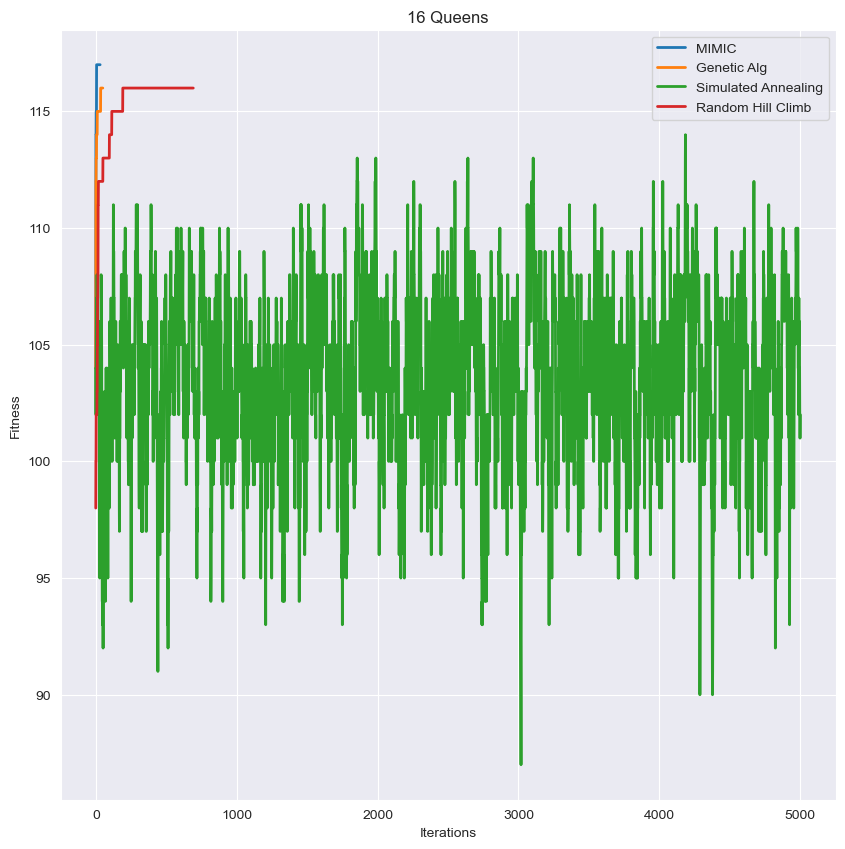

In [19]:
all_curves = {"MIMIC": best_curve_mmc.Fitness, "Genetic Alg": best_curve_ga.Fitness, "Simulated Annealing": best_curve_sa.Fitness, "Random Hill Climb": best_curve_rhc.Fitness}

np.array([len(x) for x in all_curves]).max()

plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.title("16 Queens")

for name, curve in all_curves.items():
    plt.plot(range(len(curve)), curve, label=name, lw=2)

    plt.legend(loc="best")
plt.show()

## Function Evaluation vs Input Size

In [20]:
def prob_gen(input=150):
    length = input
    # Initialize custom fitness function object
    q_fitness = mlrh.CustomFitness(queens_max)
    prob = mlrh.DiscreteOpt(length=length,
                      fitness_fn=q_fitness,
                      maximize=True,
                        max_val = 16)

    return prob

In [21]:
def eval_count_mimic(prob):
    s = time.time()
    max_attempts = 100
    max_iters = 25
    keep_pct=0.1
    pop_size = 1000
    best_state, best_fitness, mimic_curve = mlrh.mimic(prob,
                                             max_attempts=max_attempts,
                                             max_iters=max_iters,
                                             random_state=random_state,
                                             pop_size=pop_size,
                                             keep_pct=keep_pct,
                                             curve=True)
    e = time.time()
    t_diff = e-s
    result = (len(mimic_curve), t_diff)
    return result

In [22]:
def eval_count_gen(prob):
    s = time.time()
    max_attempts = 100
    max_iters = 25
    mutation_prob=0.1
    pop_size = 500
    best_state, best_fitness, gen_curve = mlrh.genetic_alg(prob,
                                                   max_attempts=max_attempts,
                                                   max_iters=max_iters,
                                                   random_state=random_state,
                                                   pop_size=pop_size,
                                                   mutation_prob=mutation_prob,
                                                   curve=True)
    e = time.time()
    t_diff = e-s
    result = (len(gen_curve), t_diff)
    return result

In [23]:
def eval_count_sa(prob):
    s = time.time()
    max_attempts = 500
    max_iters = 5000
    init_temp = 10
    schedule = mlrh.ArithDecay(init_temp)
    best_state, best_fitness, sa_curve = mlrh.simulated_annealing(prob,
                                                             max_attempts=max_attempts,
                                                             max_iters=max_iters,
                                                             random_state=random_state,
                                                             schedule=schedule,
                                                             curve=True)
    e = time.time()
    t_diff = e-s
    result = (len(sa_curve), t_diff)
    return result

In [24]:
def eval_count_rhc(prob):
    s = time.time()
    max_attempts = 500
    max_iters = 5000
    restarts = 10
    best_state, best_fitness, rhc_curve = mlrh.random_hill_climb(prob,
                                                         max_attempts=max_attempts,
                                                         max_iters=max_iters,
                                                         random_state=random_state,
                                                         restarts=restarts,
                                                         curve=True)
    e = time.time()
    t_diff = e-s
    result = (len(rhc_curve), t_diff)
    return result

In [25]:
np.random.seed(1)
inputs = range(10, 110, 10)

mimic_curve_eval = [eval_count_mimic(prob_gen(x)) for x in inputs]
gen_curve_eval = [eval_count_gen(prob_gen(x)) for x in inputs]
sa_curve_eval = [eval_count_sa(prob_gen(x)) for x in inputs]
rhc_curve_eval = [eval_count_rhc(prob_gen(x)) for x in inputs]

all_curves = {"MIMIC": mimic_curve_eval,
              "Genetic Alg": gen_curve_eval,
              "Simulated Annealing": sa_curve_eval,
              "Random Hill Climb": rhc_curve_eval}


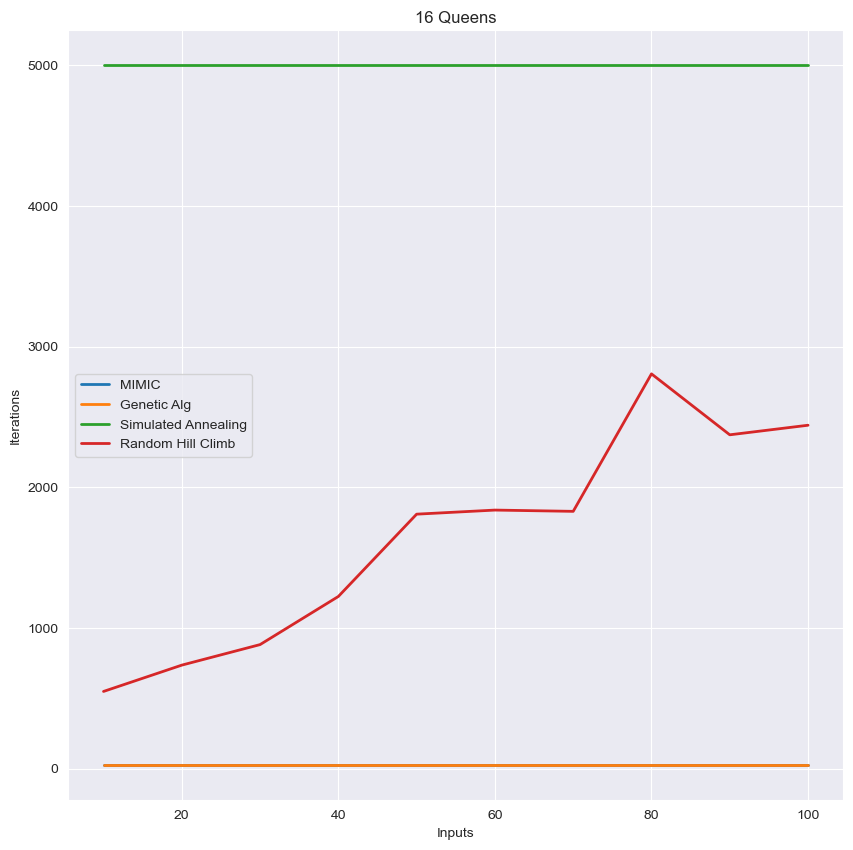

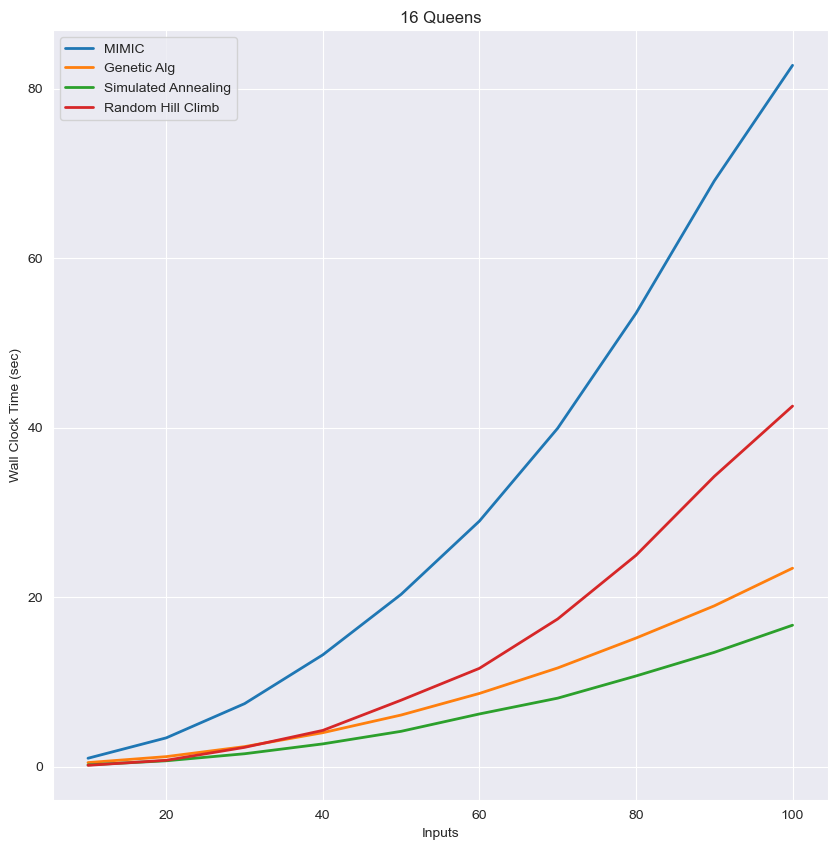

In [26]:
l = [("Inputs", "Iterations"),
     ("Inputs", "Wall Clock Time (sec)")]

for i in range(2):
    plt.xlabel(l[i][0])
    plt.ylabel(l[i][1])
    plt.title("16 Queens")

    for name, curve in all_curves.items():
        plt.plot(inputs, [x[i] for x in curve], label=name, lw=2)

        plt.legend(loc="best")
    plt.show()

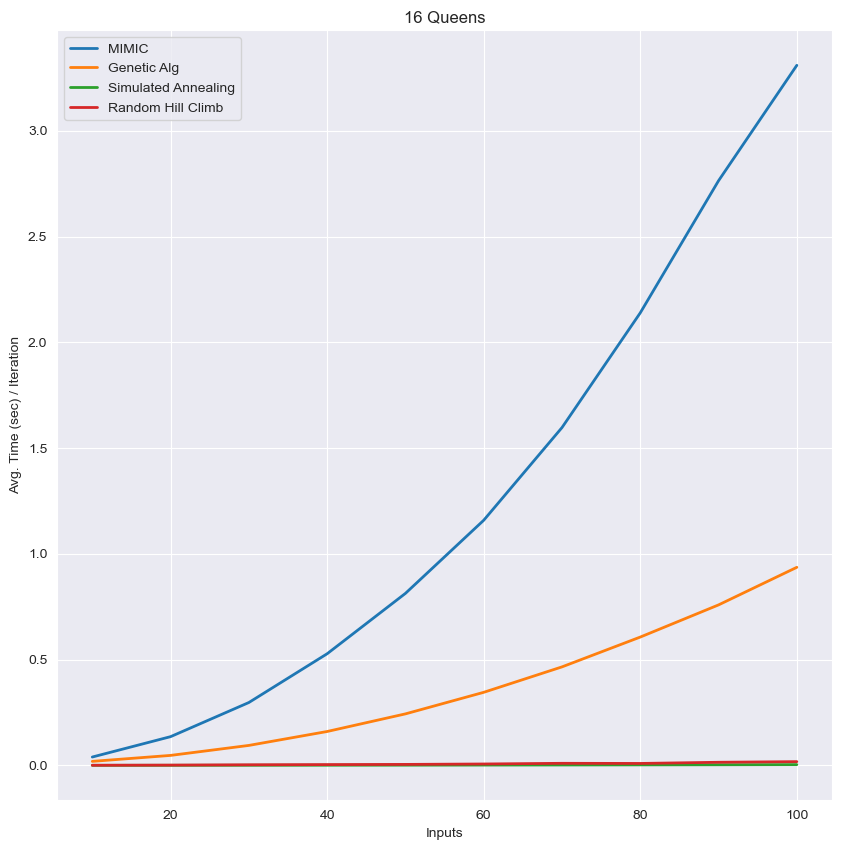

In [27]:
plt.xlabel("Inputs")
plt.ylabel("Avg. Time (sec) / Iteration")
plt.title("16 Queens")

for name, curve in all_curves.items():
    avg_time_div_iterations = np.array([x[1] for x in curve]) / np.array([x[0] for x in curve])
    plt.plot(inputs, avg_time_div_iterations, label=name, lw=2)

    plt.legend(loc="best")
plt.show()